<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Tensorflow_Certificate_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [41]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [42]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

fatal: destination path 'pubmed-rct' already exists and is not an empty directory.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [43]:
data_dir = "pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/"

In [44]:
import os

os.listdir(data_dir)

['test.txt', 'dev.txt', 'train.txt']

In [45]:
train_dir = os.path.join(data_dir, 'train.txt')
test_dir = os.path.join(data_dir, 'dev.txt')

In [46]:
with open(train_dir, 'r') as f:
  raw_data_train = f.readlines() 

with open(test_dir, 'r') as f:
  raw_data_test = f.readlines() 

In [47]:
raw_data_train[:20]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [48]:
def sort_article(data):
  data_list = []
  article = []
  for line in data:
    article.append(line)
    if line.isspace():
      data_list.append(article)
      article = []
  return data_list

In [49]:
sort_article(raw_data_train)[0]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [50]:
def to_dic_list(data):

  data_list = sort_article(data)
  data_dir_list = []
  for article in data_list:
    for i, line in enumerate(article[1:len(article)-1]):
      data_dir = {}
      line_split = line.split('\t')
      data_dir['target'] = line_split[0]
      data_dir['text'] = line_split[1].strip()
      data_dir['total_lines'] = len(article)-3
      data_dir['line_number'] = i
      data_dir_list.append(data_dir)
  return data_dir_list

In [51]:
train_list = to_dic_list(raw_data_train)
test_list = to_dic_list(raw_data_test)
train_list[:5]

[{'line_number': 0,
  'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'total_lines': 11},
 {'line_number': 1,
  'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'total_lines': 11},
 {'line_number': 2,
  'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'total_lines': 11},
 {'line_number': 3,
  'target': 'METHODS',
  'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'total_lines': 11},
 {'line_number': 4,
  'target': 'METHODS',
  'text': 'Secondary outcome measures include

In [52]:
train_df = pd.DataFrame(train_list)
test_df = pd.DataFrame(test_list)
train_df

,target,text,total_lines,line_number
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,11,0
1,METHODS,A total of @ patients with primary knee OA wer...,11,1
2,METHODS,Outcome measures included pain reduction and i...,11,2
3,METHODS,Pain was assessed using the visual analog pain...,11,3
4,METHODS,Secondary outcome measures included the Wester...,11,4
...,...,...,...,...
180035,RESULTS,For the absolute change in percent atheroma vo...,11,7
180036,RESULTS,"For PAV , a significantly greater percentage o...",11,8
180037,RESULTS,Both strategies had acceptable side effect pro...,11,9
180038,CONCLUSIONS,"Compared with standard statin monotherapy , th...",11,10


(array([13839.,     0., 59353.,     0.,     0., 57953.,     0., 27168.,
            0., 21727.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

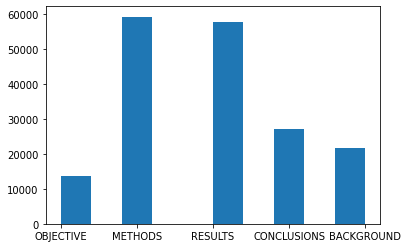

In [53]:
plt.hist(train_df['target'])

(array([ 1393., 23102., 67507., 40551., 32807., 11026.,  2051.,  1223.,
          291.,    89.]),
 array([ 3. ,  5.7,  8.4, 11.1, 13.8, 16.5, 19.2, 21.9, 24.6, 27.3, 30. ]),
 <a list of 10 Patch objects>)

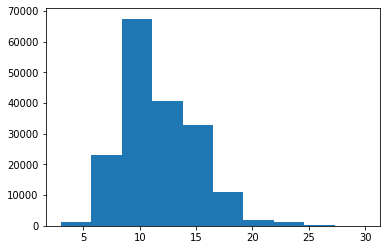

In [54]:
plt.hist(train_df['total_lines'])

In [55]:
X_train = train_df['text'].to_list()
X_test = test_df['text'].to_list()

In [56]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_train = le.fit_transform(train_df['target'].to_list())
y_test = le.transform(test_df['target'].to_list())

In [57]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

def evaluate_results(y_true, y_pred):
  model_accuracy = accuracy_score(y_true, y_pred)
  model_precision, model_recall, model_fscore, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
  model_result = {'model_accuracy': model_accuracy,
                  'model_precision': model_precision,
                  'model_recall': model_recall,
                  'model_fscore': model_fscore}
  return model_result

#Model

In [ ]:
#input (batch, 1:string)
#TextVectorization (batch, 55:output_sen_len)
#Embedding(batch, 55, embed_dims)
#Conv1D(batch, new_seq, filters)
#GlobalAveragePooling1D (batch, filters)
#output (batch, len_classes)

55


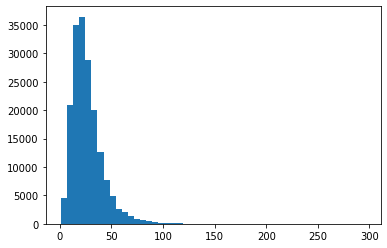

In [91]:
sentences_length = [len(sentences.split()) for sentences in train_df['text'].to_list()]
plt.hist(sentences_length, bins=50)
output_sen_len = int(np.percentile(sentences_length, 95))
print(output_sen_len)

In [21]:
max_tokens = 68000
text_vectorizer = layers.TextVectorization(max_tokens=max_tokens,
                                           output_sequence_length=output_sen_len)
text_vectorizer.adapt(X_train)

In [ ]:
text_vectorizer(X_train[0])

<tf.Tensor: shape=(55,), dtype=int64, numpy=
array([   6,  331,    2,   79,    4,   53,    4,  161, 1127,  217, 2535,
          5,  557,   65, 1584,    3,  670, 5559,  636,    5,    2,  654,
       1137,    3,  180,    2,   70,  495,   36,  781,   15,   53,    5,
        350,  266,    7,  362,    6,  289,  517, 1430, 1743,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])>

In [ ]:
text_vectorizer.get_vocabulary()[:5], text_vectorizer.get_vocabulary()[-5:]

(['', '[UNK]', 'the', 'and', 'of'],
 ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp'])

In [27]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
for text, label in train_dataset.take(1):
  print(text)
  print(text_vectorizer(text))

tf.Tensor(b'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .', shape=(), dtype=string)
tf.Tensor(
[   6  331    2   79    4   53    4  161 1127  217 2535    5  557   65
 1584    3  670 5559  636    5    2  654 1137    3  180    2   70  495
   36  781   15   53    5  350  266    7  362    6  289  517 1430 1743
    0    0    0    0    0    0    0    0    0    0    0    0    0], shape=(55,), dtype=int64)


In [ ]:
for string in test_dataset.take(1):
  print(string)

In [28]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [22]:
vocab_size = len(text_vectorizer.get_vocabulary())
embedding_dims = 128
cnn_filters = 64
kernel_size = 5
output_dims = len(le.classes_)

In [ ]:
inputs = layers.Input(shape=(1,), dtype='string', name='input')
x = text_vectorizer(inputs)
x = layers.Embedding(input_dim=vocab_size,
                     output_dim=embedding_dims,
                     name='embed')(x)
x = layers.Conv1D(filters=cnn_filters,
                  kernel_size=kernel_size,
                  padding='same',
                  activation='relu')(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(units=output_dims)(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,
                        epochs=3,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        validation_data=test_dataset,
                        validation_steps=int(0.1*len(test_dataset)))

Epoch 1/3
562/562 [==============================] - 58s 102ms/step - loss: 0.9223 - accuracy: 0.6336 - val_loss: 0.6832 - val_accuracy: 0.7424
Epoch 2/3
562/562 [==============================] - 71s 127ms/step - loss: 0.6540 - accuracy: 0.7580 - val_loss: 0.6233 - val_accuracy: 0.7713
Epoch 3/3
562/562 [==============================] - 76s 136ms/step - loss: 0.6141 - accuracy: 0.7760 - val_loss: 0.5959 - val_accuracy: 0.7876


In [ ]:
model.evaluate(test_dataset)

945/945 [==============================] - 7s 7ms/step - loss: 0.5977 - accuracy: 0.7873


[0.5976597666740417, 0.7873361706733704]

In [ ]:
def make_prediction(input_string):
  pred_pro = model.predict(tf.expand_dims(input_string, axis=0))
  prediction = le.classes_[tf.argmax(tf.squeeze(pred_pro))]

  return prediction

In [ ]:
example_string = 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .'
make_prediction(example_string)

'OBJECTIVE'

#Model_2: Feature Extraction from tf hub

In [17]:
import tensorflow_hub as hub

embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [23]:
inputs = layers.Input(shape=[], dtype='string') #check the input of pretrained model 
x = embedding_layer(inputs) #(batch, 512)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(output_dims)(x)

model_2 = tf.keras.Model(inputs, outputs)

In [30]:
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [25]:
output_dims

5

In [31]:
history_2 = model_2.fit(train_dataset,
                        epochs=3,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        validation_data=test_dataset,
                        validation_steps=int(0.1*len(test_dataset)))

Epoch 1/3
562/562 [==============================] - 18s 24ms/step - loss: 0.9143 - accuracy: 0.6512 - val_loss: 0.7939 - val_accuracy: 0.6875
Epoch 2/3
562/562 [==============================] - 12s 21ms/step - loss: 0.7670 - accuracy: 0.7029 - val_loss: 0.7499 - val_accuracy: 0.7081
Epoch 3/3
562/562 [==============================] - 12s 21ms/step - loss: 0.7478 - accuracy: 0.7132 - val_loss: 0.7328 - val_accuracy: 0.7181


#Model_3 Character based embedding

Mean length: 149.37
Length that cover 95% of the samples: 290


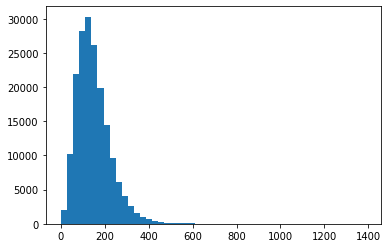

In [92]:
sentences_length = [len(sentences) for sentences in train_df['text'].to_list()]
plt.hist(sentences_length, bins=50)
print(f'Mean length: {np.mean(sentences_length):.2f}')
output_sen_len_char = int(np.percentile(sentences_length, 95))
print(f'Length that cover 95% of the samples: {output_sen_len_char}')

In [70]:
text_vectorizer_char = layers.TextVectorization(max_tokens=50,
                                                split='character',
                                                output_sequence_length=output_sen_len_char)
text_vectorizer_char.adapt(X_train)

In [73]:
text_vectorizer_char.get_vocabulary()[:5], text_vectorizer_char.get_vocabulary()[-5:]

(['', '[UNK]', ' ', 'e', 't'], ['k', 'x', 'z', 'q', 'j'])

In [74]:
len(text_vectorizer_char.get_vocabulary())

29

In [ ]:
vocab_size = len(text_vectorizer_char.get_vocabulary())
embedding_dims = 25
cnn_filters = 64
kernel_size = 5
output_dims = len(le.classes_)

In [75]:
inputs = layers.Input(shape=(1,), dtype='string')
x = text_vectorizer_char(inputs)
x = layers.Embedding(input_dim=vocab_size,
                     output_dim=embedding_dims)(x)
x = layers.Conv1D(filters=cnn_filters,
                  kernel_size=kernel_size,
                  padding='same',
                  activation='relu')(x)
x = layers.GlobalMaxPooling1D()(x)
outputs = layers.Dense(output_dims)(x)

model_3 = tf.keras.Model(inputs, outputs)

In [76]:
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [77]:
history_3 = model_3.fit(train_dataset,
                        epochs=3,
                        steps_per_epoch=int(0.1*len(train_dataset)),
                        validation_data=test_dataset,
                        validation_steps=int(0.1*len(test_dataset)))

Epoch 1/3
562/562 [==============================] - 83s 145ms/step - loss: 1.0668 - accuracy: 0.5747 - val_loss: 0.8752 - val_accuracy: 0.6765
Epoch 2/3
562/562 [==============================] - 82s 146ms/step - loss: 0.8446 - accuracy: 0.6728 - val_loss: 0.8043 - val_accuracy: 0.6902
Epoch 3/3
562/562 [==============================] - 80s 143ms/step - loss: 0.7977 - accuracy: 0.6945 - val_loss: 0.7718 - val_accuracy: 0.6941
